✅ Grafik 'barchart_lutfenol111sunclean.png' olarak kaydedildi.


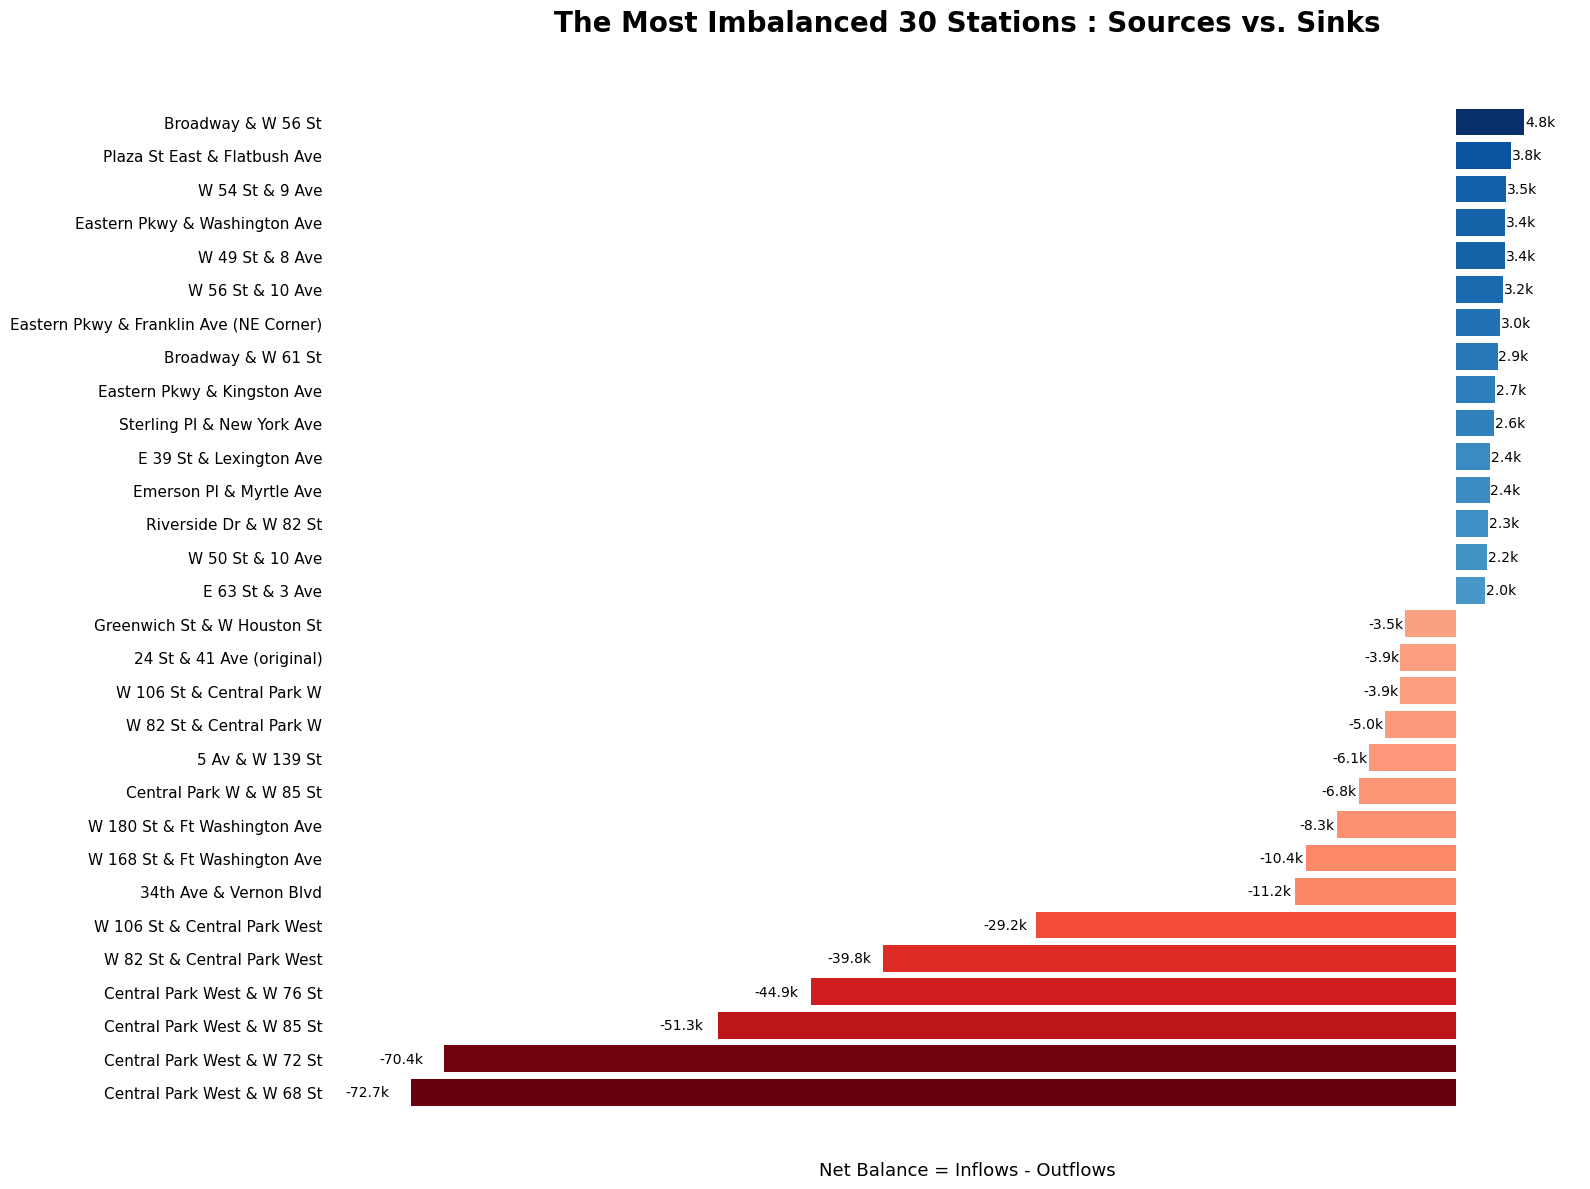

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 1. Veri Hazırlığı
df_stats = pd.read_csv("station_stats.csv")
df_stats['Net_Balance'] = df_stats['Net_Balance'].astype(str).str.replace(',', '')
df_stats['Net_Balance'] = pd.to_numeric(df_stats['Net_Balance'], errors='coerce').fillna(0)

df_grouped = df_stats.groupby('start_station_name', as_index=False)['Net_Balance'].sum()
df_sorted = df_grouped.sort_values(by='Net_Balance')

bottom_15 = df_sorted.head(15)
top_15 = df_sorted.tail(15)
chart_data = pd.concat([bottom_15, top_15])

# 2. Grafik Tuvali
fig, ax = plt.subplots(figsize=(16, 12))

# 3. Renk Hesaplama
max_red = abs(bottom_15['Net_Balance'].min()) 
max_blue = top_15['Net_Balance'].max()        

colors = []
for val in chart_data['Net_Balance']:
    if val < 0:
        intensity = 0.3 + (0.7 * (abs(val) / max_red))
        colors.append(cm.Reds(intensity))
    else:
        intensity = 0.3 + (0.7 * (val / max_blue))
        colors.append(cm.Blues(intensity))

# 4. Çizim
bars = ax.barh(chart_data['start_station_name'], chart_data['Net_Balance'], color=colors)

# Eksen Ayarları
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelsize=11, pad=20)
ax.set_title("The Most Imbalanced 30 Stations : Sources vs. Sinks", fontsize=20, pad=20, fontweight='bold')
ax.set_xlabel("Net Balance = Inflows - Outflows", fontsize=13)

# Çerçeve Temizliği
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])

# 5. Sayıları Yazma
for bar in bars:
    width = bar.get_width()
    label_x_pos = width * 1.02 if width > 0 else width * 1.02
    align = 'left' if width > 0 else 'right'
    text_val = f'{width/1000:.1f}k'
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, text_val,
            va='center', ha=align, fontsize=10, fontweight='normal', color='black')

# 6. Kaydet
plt.tight_layout()
plt.savefig('barchart.png', dpi=300, bbox_inches='tight')
print("Grafik 'barchart.png' olarak kaydedildi.")
plt.show()

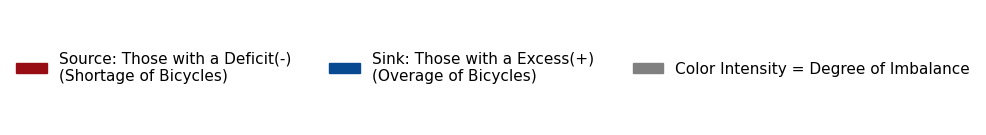

In [77]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

# 1. Legend
fig_leg, ax_leg = plt.subplots(figsize=(12, 1.5)) 
ax_leg.axis('off') 

# 2. Legend Elemanları
legend_elements = [
    mpatches.Patch(color=cm.Reds(0.9), label='Source: Those with a Deficit(-)\n(Shortage of Bicycles)'),
    mpatches.Patch(color=cm.Blues(0.9), label='Sink: Those with a Excess(+)\n(Overage of Bicycles)'),
    mpatches.Patch(color='gray', label='Color Intensity = Degree of Imbalance')
]

# 3. Legend'ı Çiz
legend = ax_leg.legend(
    handles=legend_elements, 
    loc='center', 
    ncol=3,               
    frameon=False,        
    fontsize=11,
    columnspacing=2.5    
)

# 4. Kaydet
plt.savefig('legend.png', dpi=300, bbox_inches='tight')
plt.show()